Summary  
housing_data_df2 = reduced columns for project, looking at 2016-2018, dropna in 'Price'  
housing_data_df3 = looking at 2016-2017 only  
housing_data_df4 = looking at 3 bedrooms houses only  
housing_data_df5 = housing dataset use for vs interest rate  
interest_rate_1617_df = monthly interest rate from 2016-2017

In [1]:
#import .csv file for question 1 (interest rate vs housing price) 

from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
import warnings

housing_data_file = Path('Resources/melb_housing_data.csv')
interest_rate_file = Path('Resources/F5_Indicator_Lending_Rates.csv')
housing_data_df = pd.read_csv(housing_data_file, low_memory=False)
interest_rate_df = pd.read_csv(interest_rate_file, low_memory=False, encoding='UTF-8')


In [2]:
housing_data_df

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,126.0,inf,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,303.0,225,2016.0,Moonee Valley City Council,-37.71800,144.87800,Western Metropolitan,3464.0,Detached Garage,840000.0
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,120.0,82,1900.0,Port Phillip City Council,-37.84590,144.95550,Southern Metropolitan,3280.0,Attached Garage,1275000.0
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,...,159.0,inf,NaN,Port Phillip City Council,-37.84500,144.95380,Southern Metropolitan,3280.0,Indoor,1455000.0
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,...,174.0,122,2003.0,Darebin City Council,-37.78180,145.01980,Northern Metropolitan,2211.0,Parkade,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Reservoir,18 Elinda Pl,3,u,SP,RW,30/09/2017,12.0,3073.0,3.0,...,NaN,105,1990.0,Darebin City Council,-37.69769,145.02332,Northern Metropolitan,21650.0,Parkade,475000.0
34853,Roxburgh Park,14 Stainsby Cr,4,h,S,Raine,30/09/2017,20.6,3064.0,4.0,...,NaN,225,1995.0,Hume City Council,-37.63665,144.92976,Northern Metropolitan,5833.0,Underground,591000.0
34854,Springvale South,8 Bellbird Ct,4,h,PI,Barry,30/09/2017,22.2,3172.0,4.0,...,534.0,152,1970.0,Greater Dandenong City Council,-37.97037,145.15449,South-Eastern Metropolitan,4054.0,Carport,NaN
34855,Springvale South,30 Waddington Cr,3,h,S,Harcourts,30/09/2017,22.2,3172.0,3.0,...,544.0,NaN,NaN,Greater Dandenong City Council,-37.97751,145.14813,South-Eastern Metropolitan,4054.0,Detached Garage,780500.0


In [3]:
#Reduced columns in housing dataset
columns_to_use = ['Suburb', 'Address', 'Regionname', 'Type', 'Date', 'Bedroom','Propertycount', 'Distance', 'Landsize', 'Latitude', 'Longtitude', 'Price']
housing_data_df_reduced = housing_data_df[columns_to_use]

#dropna in Price of housing dataset
housing_data_df_dropna_price = housing_data_df_reduced.dropna(how='any', subset='Price')
housing_data_df2 = housing_data_df_dropna_price
housing_data_df2.isna().sum()


Suburb              0
Address             0
Regionname          0
Type                0
Date                0
Bedroom          6441
Propertycount       3
Distance            1
Landsize         9265
Latitude         6254
Longtitude       6254
Price               0
dtype: int64

In [4]:
#Housing_data_df2 = Reduced columns, dropna in price, Year:2016-2018, sorted by Date

#Separate Date into Month and Year columns
warnings.filterwarnings('ignore')
housing_data_df2['Date'] = pd.to_datetime(housing_data_df2['Date'], format='%d/%m/%Y')
housing_data_df2['Month'] = housing_data_df2['Date'].dt.month
housing_data_df2['Year'] = housing_data_df2['Date'].dt.year

#Rearanging columns in housing dataset + sort by Date
housing_data_df2 = housing_data_df2[['Suburb', 'Address', 'Regionname', 'Type', 'Date', 'Year', 'Month', 'Bedroom', 'Propertycount', 'Distance', 'Landsize', 'Latitude', 'Longtitude', 'Price']]
housing_data_df2 = housing_data_df2.sort_values(['Year','Month'],ascending=True).reset_index(drop=True)
housing_data_df2


,Suburb,Address,Regionname,Type,Date,Year,Month,Bedroom,Propertycount,Distance,Landsize,Latitude,Longtitude,Price
0,Surrey Hills,1/10 Florence Rd,Southern Metropolitan,u,2016-01-28,2016,1,2.0,5457.0,11.2,108.0,-37.82760,145.10230,813000.0
1,Surrey Hills,999A Riversdale Rd,Southern Metropolitan,h,2016-01-28,2016,1,3.0,5457.0,11.2,490.0,-37.83610,145.10060,1205000.0
2,Abbotsford,25 Bloomburg St,Northern Metropolitan,h,2016-02-04,2016,2,2.0,4019.0,2.5,156.0,-37.80790,144.99340,1035000.0
3,Altona,1/123 Blyth St,Western Metropolitan,t,2016-02-04,2016,2,2.0,5301.0,13.8,292.0,-37.86870,144.81970,720000.0
4,Ascot Vale,42 Archer Av,Western Metropolitan,h,2016-02-04,2016,2,NaN,6567.0,5.9,NaN,NaN,NaN,895000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27242,Yarraville,134 Gamon St,Western Metropolitan,h,2018-03-17,2018,3,3.0,6543.0,6.3,597.0,-37.81281,144.88912,1575000.0
27243,Yarraville,3/87 Gamon St,Western Metropolitan,u,2018-03-17,2018,3,NaN,6543.0,6.3,NaN,NaN,NaN,525000.0
27244,Yarraville,42 Kingston St,Western Metropolitan,h,2018-03-17,2018,3,2.0,6543.0,6.3,188.0,-37.81449,144.88065,939000.0
27245,Yarraville,25 Ovens St,Western Metropolitan,h,2018-03-17,2018,3,3.0,6543.0,6.3,207.0,-37.81846,144.89216,855000.0


In [5]:
#housing_data_df3 = Year: 2016-2017
housing_data_df3 = housing_data_df2.loc[housing_data_df2['Year']!=2018,:]
housing_data_df3

,Suburb,Address,Regionname,Type,Date,Year,Month,Bedroom,Propertycount,Distance,Landsize,Latitude,Longtitude,Price
0,Surrey Hills,1/10 Florence Rd,Southern Metropolitan,u,2016-01-28,2016,1,2.0,5457.0,11.2,108.0,-37.82760,145.10230,813000.0
1,Surrey Hills,999A Riversdale Rd,Southern Metropolitan,h,2016-01-28,2016,1,3.0,5457.0,11.2,490.0,-37.83610,145.10060,1205000.0
2,Abbotsford,25 Bloomburg St,Northern Metropolitan,h,2016-02-04,2016,2,2.0,4019.0,2.5,156.0,-37.80790,144.99340,1035000.0
3,Altona,1/123 Blyth St,Western Metropolitan,t,2016-02-04,2016,2,2.0,5301.0,13.8,292.0,-37.86870,144.81970,720000.0
4,Ascot Vale,42 Archer Av,Western Metropolitan,h,2016-02-04,2016,2,NaN,6567.0,5.9,NaN,NaN,NaN,895000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23568,Wyndham Vale,245 McGrath Rd,Western Metropolitan,h,2017-12-09,2017,12,3.0,5262.0,27.2,NaN,-37.89783,144.62831,420000.0
23569,Wyndham Vale,26 Ribblesdale Av,Western Metropolitan,h,2017-12-09,2017,12,3.0,5262.0,27.2,613.0,-37.89552,144.61926,415000.0
23570,Wyndham Vale,19 Whitmore Pl,Western Metropolitan,h,2017-12-09,2017,12,3.0,5262.0,27.2,810.0,-37.88318,144.61741,600000.0
23571,Yarraville,36B Goulburn St,Western Metropolitan,h,2017-12-09,2017,12,3.0,6543.0,6.3,NaN,-37.81488,144.88922,1160000.0


In [7]:
#housing_data_df4 = looking at 3 bedrooms houses only

#dropna in bedroom
housing_data_df4 = housing_data_df3.dropna(how='any', subset='Bedroom')
#Looking at houses with 3 bedrooms only
housing_data_df4 = housing_data_df4.loc[(housing_data_df4['Type']=='h')&(housing_data_df4['Bedroom']==3.0),:].reset_index(drop=True)
housing_data_df4


,Suburb,Address,Regionname,Type,Date,Year,Month,Bedroom,Propertycount,Distance,Landsize,Latitude,Longtitude,Price
0,Surrey Hills,999A Riversdale Rd,Southern Metropolitan,h,2016-01-28,2016,1,3.0,5457.0,11.2,490.0,-37.83610,145.10060,1205000.0
1,Bentleigh,11A Mortimore St,Southern Metropolitan,h,2016-02-04,2016,2,3.0,6795.0,13.0,299.0,-37.92720,145.04060,1222500.0
2,Burwood,163 Highbury Rd,Southern Metropolitan,h,2016-02-04,2016,2,3.0,5678.0,11.7,695.0,-37.85510,145.11210,1151000.0
3,Burwood,30 Station St,Southern Metropolitan,h,2016-02-04,2016,2,3.0,5678.0,11.7,931.0,-37.85400,145.11950,1755000.0
4,Coburg,8 Watchtower Rd,Northern Metropolitan,h,2016-02-04,2016,2,3.0,11204.0,7.8,142.0,-37.73820,144.97300,675000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6739,Wyndham Vale,18 Greenwood St,Western Metropolitan,h,2017-12-09,2017,12,3.0,5262.0,27.2,567.0,-37.89087,144.62252,425000.0
6740,Wyndham Vale,245 McGrath Rd,Western Metropolitan,h,2017-12-09,2017,12,3.0,5262.0,27.2,NaN,-37.89783,144.62831,420000.0
6741,Wyndham Vale,26 Ribblesdale Av,Western Metropolitan,h,2017-12-09,2017,12,3.0,5262.0,27.2,613.0,-37.89552,144.61926,415000.0
6742,Wyndham Vale,19 Whitmore Pl,Western Metropolitan,h,2017-12-09,2017,12,3.0,5262.0,27.2,810.0,-37.88318,144.61741,600000.0


In [8]:
#Housing_data_df5 = data use for vs interest rate

#rduced columns to use for comparing interest rate
housing_data_df5 = housing_data_df4[['Suburb', 'Address', 'Regionname', 'Year', 'Month', 'Propertycount', 'Price']]
housing_data_df5


,Suburb,Address,Regionname,Year,Month,Propertycount,Price
0,Surrey Hills,999A Riversdale Rd,Southern Metropolitan,2016,1,5457.0,1205000.0
1,Bentleigh,11A Mortimore St,Southern Metropolitan,2016,2,6795.0,1222500.0
2,Burwood,163 Highbury Rd,Southern Metropolitan,2016,2,5678.0,1151000.0
3,Burwood,30 Station St,Southern Metropolitan,2016,2,5678.0,1755000.0
4,Coburg,8 Watchtower Rd,Northern Metropolitan,2016,2,11204.0,675000.0
...,...,...,...,...,...,...,...
6739,Wyndham Vale,18 Greenwood St,Western Metropolitan,2017,12,5262.0,425000.0
6740,Wyndham Vale,245 McGrath Rd,Western Metropolitan,2017,12,5262.0,420000.0
6741,Wyndham Vale,26 Ribblesdale Av,Western Metropolitan,2017,12,5262.0,415000.0
6742,Wyndham Vale,19 Whitmore Pl,Western Metropolitan,2017,12,5262.0,600000.0


In [9]:
housing_data_df5['Regionname'].value_counts()

Regionname
Northern Metropolitan         2017
Western Metropolitan          1841
Southern Metropolitan         1549
Eastern Metropolitan           806
South-Eastern Metropolitan     388
Eastern Victoria                50
Northern Victoria               49
Western Victoria                44
Name: count, dtype: int64

In [10]:
interest_rate_df.head()

,Title,Lending rates; Small business; Variable; Term,Lending rates; Small business; Variable; Overdraft,Lending rates; Housing loans; Banks; Variable; Standard; Owner-occupier,Lending rates; Housing loans; Banks; Variable; Discounted; Owner-occupier,Lending rates; Housing loans; Banks; Variable; Standard interest-only; Owner-occupier,Lending rates; Housing loans; Banks; 3-year fixed; Owner-occupier,Lending rates; Housing loans; Banks; Variable; Standard; Investor,Lending rates; Housing loans; Banks; Variable; Discounted; Investor,Lending rates; Housing loans; Banks; Variable; Standard interest-only; Investor,...,Lending rates; Personal loans; Term loans (unsecured); Variable,Lending rates; Personal loans; Revolving credit; Home equity loans,Lending rates; Personal loans; Revolving credit; Margin loans,Lending rates; Housing loans; Mortgage managers; Variable; Standard,Lending rates; Housing loans; Mortgage managers; Variable; Basic,Lending rates; Securitised housing loans; Average outstanding variable rate,Lending rates; Securitised housing loans; Average outstanding variable rate; Owner-occupier; Principal & Interest,Lending rates; Securitised housing loans; Average outstanding variable rate; Owner-occupier; Interest Only,Lending rates; Securitised housing loans; Average outstanding variable rate; Investor; Principal & Interest,Lending rates; Securitised housing loans; Average outstanding variable rate; Investor; Interest Only
0,Description,Lending rates; Small business; Variable; Term,Lending rates; Small business; Variable; Overd...,Lending rates; Housing loans; Banks; Variable;...,Lending rates; Housing loans; Banks; Variable;...,Lending rates; Housing loans; Banks; Variable;...,Lending rates; Housing loans; Banks; 3-year fi...,Lending rates; Housing loans; Banks; Variable;...,Lending rates; Housing loans; Banks; Variable;...,Lending rates; Housing loans; Banks; Variable;...,...,Lending rates; Personal loans; Term loans (uns...,Lending rates; Personal loans; Revolving credi...,Lending rates; Personal loans; Revolving credi...,Lending rates; Housing loans; Mortgage manager...,Lending rates; Housing loans; Mortgage manager...,Lending rates; Securitised housing loans; Aver...,Lending rates; Securitised housing loans; Aver...,Lending rates; Securitised housing loans; Aver...,Lending rates; Securitised housing loans; Aver...,Lending rates; Securitised housing loans; Aver...
1,Frequency,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,...,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly
2,Type,Original,Original,Original,Original,Original,Original,Original,Original,Original,...,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original
3,Units,Per cent per annum,Per cent per annum,Per cent per annum,Per cent per annum,Per cent per annum,Per cent per annum,Per cent per annum,Per cent per annum,Per cent per annum,...,Per cent per annum,Per cent per annum,Per cent per annum,Per cent per annum,Per cent per annum,Per cent per annum,Per cent per annum,Per cent per annum,Per cent per annum,Per cent per annum
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Selecting Interest rates for 2016 to 2017
interest_rate_df2 = interest_rate_df.iloc[21:45].reset_index(drop=True)
interest_rate_df2

# Drop all columns and keep Column "Lending rates; Housing loans; Banks; Variable; Standard; Owner-occupier" 
interest_rate_df2 = interest_rate_df2[['Title', 'Lending rates; Housing loans; Banks; Variable; Standard; Owner-occupier']]
interest_rate_df2


,Title,Lending rates; Housing loans; Banks; Variable; Standard; Owner-occupier
0,Jan-2016,5.63
1,Feb-2016,5.63
2,Mar-2016,5.63
3,Apr-2016,5.63
4,May-2016,5.39
5,Jun-2016,5.39
6,Jul-2016,5.39
7,Aug-2016,5.26
8,Sep-2016,5.26
9,Oct-2016,5.26


In [12]:
# Rename Header Column to Period and Housing Interest Rate
interest_rate_df2 = interest_rate_df2.rename(columns={
    'Title': 'Period',
    'Lending rates; Housing loans; Banks; Variable; Standard; Owner-occupier': 'Housing Interest Rate'
})
interest_rate_df2.head()

,Period,Housing Interest Rate
0,Jan-2016,5.63
1,Feb-2016,5.63
2,Mar-2016,5.63
3,Apr-2016,5.63
4,May-2016,5.39


In [13]:
# Split "Period" column into "MONTH" and "YEAR" and convert "MONTH" to numeric values 
interest_rate_df2[['Month', 'Year']] = interest_rate_df2['Period'].str.split('-', expand=True)
interest_rate_df2['Month'] = pd.to_datetime(interest_rate_df2['Month'], format='%b').dt.month
interest_rate_df2

,Period,Housing Interest Rate,Month,Year
0,Jan-2016,5.63,1,2016
1,Feb-2016,5.63,2,2016
2,Mar-2016,5.63,3,2016
3,Apr-2016,5.63,4,2016
4,May-2016,5.39,5,2016
5,Jun-2016,5.39,6,2016
6,Jul-2016,5.39,7,2016
7,Aug-2016,5.26,8,2016
8,Sep-2016,5.26,9,2016
9,Oct-2016,5.26,10,2016


In [34]:
interest_rate_df2['Year'] = interest_rate_df2['Year'].astype(int)
interest_rate_df2['Month'] = interest_rate_df2['Month'].astype(int)

# Merge Housing data and Interest Rate based on common columns
merged_df = pd.merge(housing_data_df3, interest_rate_df2, how='left', on=['Year', 'Month'])
merged_df


,Suburb,Address,Regionname,Type,Date,Year,Month,Bedroom,Propertycount,Distance,Landsize,Latitude,Longtitude,Price,Period,Housing Interest Rate
0,Surrey Hills,1/10 Florence Rd,Southern Metropolitan,u,2016-01-28,2016,1,2.0,5457.0,11.2,108.0,-37.82760,145.10230,813000.0,Jan-2016,5.63
1,Surrey Hills,999A Riversdale Rd,Southern Metropolitan,h,2016-01-28,2016,1,3.0,5457.0,11.2,490.0,-37.83610,145.10060,1205000.0,Jan-2016,5.63
2,Abbotsford,25 Bloomburg St,Northern Metropolitan,h,2016-02-04,2016,2,2.0,4019.0,2.5,156.0,-37.80790,144.99340,1035000.0,Feb-2016,5.63
3,Altona,1/123 Blyth St,Western Metropolitan,t,2016-02-04,2016,2,2.0,5301.0,13.8,292.0,-37.86870,144.81970,720000.0,Feb-2016,5.63
4,Ascot Vale,42 Archer Av,Western Metropolitan,h,2016-02-04,2016,2,NaN,6567.0,5.9,NaN,NaN,NaN,895000.0,Feb-2016,5.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23568,Wyndham Vale,245 McGrath Rd,Western Metropolitan,h,2017-12-09,2017,12,3.0,5262.0,27.2,NaN,-37.89783,144.62831,420000.0,Dec-2017,5.22
23569,Wyndham Vale,26 Ribblesdale Av,Western Metropolitan,h,2017-12-09,2017,12,3.0,5262.0,27.2,613.0,-37.89552,144.61926,415000.0,Dec-2017,5.22
23570,Wyndham Vale,19 Whitmore Pl,Western Metropolitan,h,2017-12-09,2017,12,3.0,5262.0,27.2,810.0,-37.88318,144.61741,600000.0,Dec-2017,5.22
23571,Yarraville,36B Goulburn St,Western Metropolitan,h,2017-12-09,2017,12,3.0,6543.0,6.3,NaN,-37.81488,144.88922,1160000.0,Dec-2017,5.22


In [35]:
# To count the number of houses sold 2016-2017
houses_sold_count = merged_df['Period'].value_counts()

houses_sold_count = pd.DataFrame({'Period': houses_sold_count.index, 'Count': houses_sold_count.values})
houses_sold_count

,Period,Count
0,Oct-2017,2441
1,Sep-2017,2053
2,Nov-2017,1995
3,Jul-2017,1806
4,Jun-2017,1463
5,May-2017,1453
6,Nov-2016,1413
7,Aug-2017,1413
8,May-2016,1167
9,Sep-2016,1166


In [36]:
# Merging the Houses sold to corsponding Housing Interest Rate for comparision 
houses_sold_countdf2 = pd.merge(houses_sold_count, interest_rate_df2, how='left', on=['Period'])
houses_sold_countdf2

,Period,Count,Housing Interest Rate,Month,Year
0,Oct-2017,2441,5.22,10,2017
1,Sep-2017,2053,5.22,9,2017
2,Nov-2017,1995,5.22,11,2017
3,Jul-2017,1806,5.22,7,2017
4,Jun-2017,1463,5.23,6,2017
5,May-2017,1453,5.29,5,2017
6,Nov-2016,1413,5.26,11,2016
7,Aug-2017,1413,5.22,8,2017
8,May-2016,1167,5.39,5,2016
9,Sep-2016,1166,5.26,9,2016


## Number of Houses sold 2016-2017

## Does the changes in interest rates impact the real estate market in Melbourne?

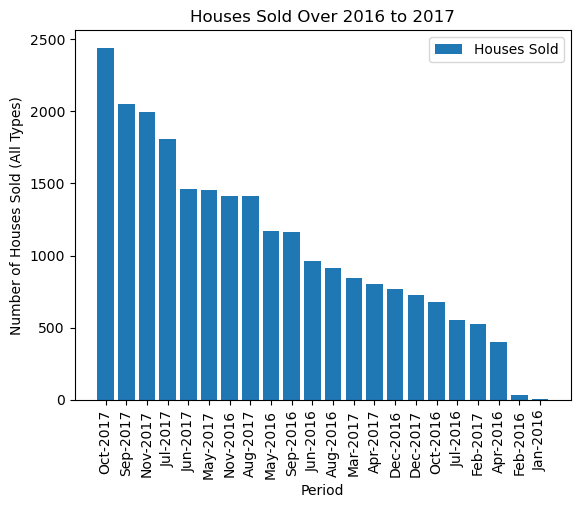

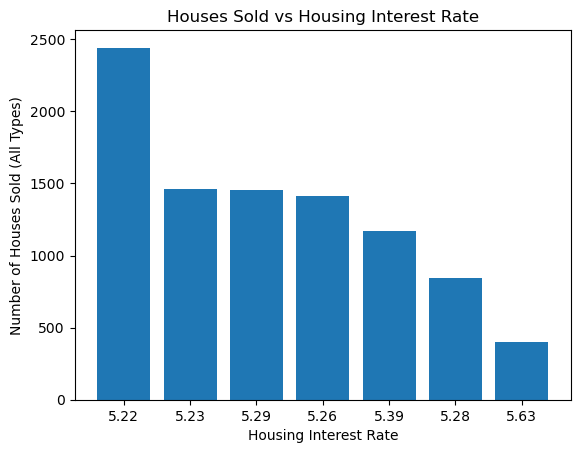

In [38]:
# Bar plot for  2016-2017
plt.bar(houses_sold_countdf2['Period'], houses_sold_countdf2['Count'], label='Houses Sold')
plt.title('Houses Sold Over 2016 to 2017')
plt.xlabel('Period')
plt.ylabel('Number of Houses Sold (All Types)')
plt.legend()
plt.xticks(rotation=90)
plt.show()

plt.bar(houses_sold_countdf2['Housing Interest Rate'], houses_sold_countdf2['Count'])
plt.title('Houses Sold vs Housing Interest Rate')
plt.xlabel('Housing Interest Rate')
plt.ylabel('Number of Houses Sold (All Types)')
plt.show()


## 3 Bedroom House

In [39]:
#back up count on 3 bedrooms only - to decide if the data is to be used
merged_df2 = pd.merge(housing_data_df5, interest_rate_df2, how='left', on=['Year', 'Month'])
houses_sold_count2=merged_df2['Period'].value_counts()

# Create a new DataFrame from the value counts
houses_sold_count2 = pd.DataFrame({'Period': houses_sold_count2.index, 'Count': houses_sold_count2.values})
houses_sold_countd_3rm = pd.merge(houses_sold_count, interest_rate_df2, how='right', on=['Period'])
houses_sold_countd_3rm


,Period,Count,Housing Interest Rate,Month,Year
0,Jan-2016,2.0,5.63,1,2016
1,Feb-2016,35.0,5.63,2,2016
2,Mar-2016,NaN,5.63,3,2016
3,Apr-2016,401.0,5.63,4,2016
4,May-2016,1167.0,5.39,5,2016
5,Jun-2016,962.0,5.39,6,2016
6,Jul-2016,553.0,5.39,7,2016
7,Aug-2016,911.0,5.26,8,2016
8,Sep-2016,1166.0,5.26,9,2016
9,Oct-2016,677.0,5.26,10,2016


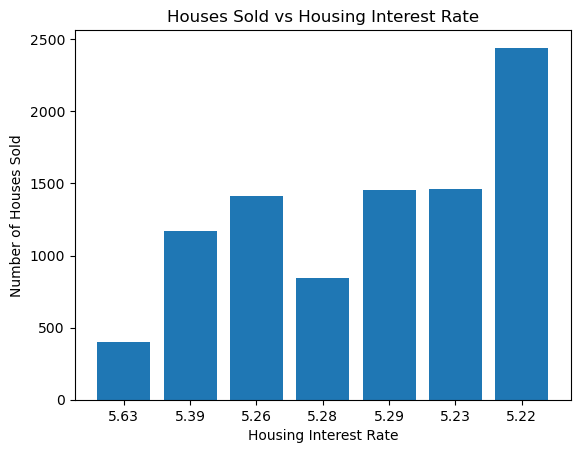

In [40]:
# Bar plot
plt.bar(houses_sold_countd_3rm['Housing Interest Rate'], houses_sold_countd_3rm['Count'])
plt.title('Houses Sold vs Housing Interest Rate')
plt.xlabel('Housing Interest Rate')
plt.ylabel('Number of Houses Sold')
plt.show()
